##  5.1 线性问题与非线性问题

### 7.1.1 用线性单分逻辑回归分析肿瘤是良性还是恶性的

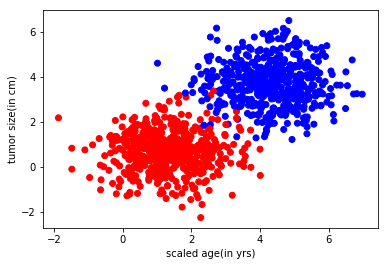

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle


# 生成样本集
# 每个数据点有两个特征-scaled age和tumor size
# 整个数据集有两个类别-良性和恶性
def generate(sample_size, mean, cov, diff, regression):
    num_class = 2  # len(diff)
    samples_per_class = int(sample_size / num_class)
    
  
    x0 = np.random.multivariate_normal(mean, cov, samples_per_class) # 根据参数生成一个二元正态分布矩阵
    y0 = np.zeros(samples_per_class) # 第一类数据的标签为0
    
  
    for ci, d in enumerate(diff): # diff为[3.0]
        x1 = np.random.multivariate_normal(mean+d, cov, samples_per_class) # 第二类数据的均值更大
        y1 = (ci+1)*np.ones(samples_per_class)# 第二类数据的标签为1
        
        x0 = np.concatenate((x0, x1))
        y0 = np.concatenate((y0, y1))
  
    if regression==False: # one_hot编码
        class_ind = [y0==class_number for class_number in range(num_classes)]
        y = np.asarray(np.hstack(class_ind), dtupe=np.float32) #array 仍会copy出一个副本，占用新的内存，但asarray不会
    x, y = shuffle(x0, y0)
    return x,y

# 调用generate函数生产1000个数据，并将其可视化

np.random.seed(10)
num_classes = 2
mean = np.random.randn(num_classes)
cov = np.eye(num_classes)
x, y = generate(1000, mean, cov, [3.0], True)
colors = ['r' if l==0 else 'b' for l in y[:]]

plt.scatter(x[:, 0], x[:, 1], c=colors)
plt.xlabel('scaled age(in yrs)')
plt.ylabel('tumor size(in cm)')
plt.show()

Epoch:1 cost=0.34223735332489014 err=0.30391838669776916
Epoch:2 cost=0.2145548015832901 err=0.13880769327282905
Epoch:3 cost=0.15810124576091766 err=0.08496032610535621
Epoch:4 cost=0.12657520174980164 err=0.0610812146961689
Epoch:5 cost=0.10666532814502716 err=0.04852508574724197
Epoch:6 cost=0.09303446114063263 err=0.04108042631298304
Epoch:7 cost=0.08312660455703735 err=0.036261964458972215
Epoch:8 cost=0.07558667659759521 err=0.032933956207707525
Epoch:9 cost=0.06964023411273956 err=0.03051970910280943
Epoch:10 cost=0.06481663882732391 err=0.028700599698349833
Epoch:11 cost=0.060814131051301956 err=0.0272881777305156
Epoch:12 cost=0.05743082985281944 err=0.026164630805142225
Epoch:13 cost=0.054526519030332565 err=0.025252915555611252
Epoch:14 cost=0.052000824362039566 err=0.02450069955550134
Epoch:15 cost=0.049780040979385376 err=0.023871302402112632
Epoch:16 cost=0.04780873656272888 err=0.02333829829003662
Epoch:17 cost=0.04604453220963478 err=0.02288220840273425
Epoch:18 cost=0.

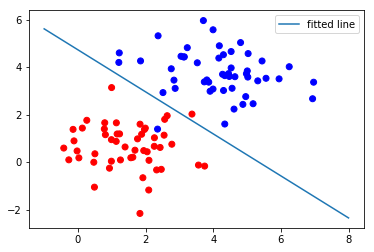

In [4]:
# 构建网络结构
lab_dim = 1
input_dim = 2

# 设置占位符
input_features = tf.placeholder(tf.float32, [None, input_dim])
input_labels = tf.placeholder(tf.float32, [None, lab_dim])

# 定义学习参数
w = tf.Variable(tf.random_normal([input_dim, lab_dim]), name='weight')
b = tf.Variable(tf.zeros([lab_dim]), name='biases')

# 定义前向结构
output = tf.nn.sigmoid(tf.matmul(input_features, w)+b)
cross_entropy = -(input_labels*tf.log(output) + (1-input_labels)*tf.log(1-output))

# 定义模型损失
ser = tf.square(input_labels-output) # 利用平方差函数评估模型的错误率
loss = tf.reduce_mean(cross_entropy)
err = tf.reduce_mean(ser)

# 定义反向结构
optimizer = tf.train.AdamOptimizer(0.04) # AdamOptimizer优化器会动态调节梯度
train = optimizer.minimize(loss)

# 设置参数进行训练
maxEpochs = 50
MiniBatchSize = 25

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(maxEpochs):
        sumerr=0
        for i in range(np.int32(len(y)/MiniBatchSize)):
            x1 = x[i*MiniBatchSize:(i+1)*MiniBatchSize, :]
            y1 = np.reshape(y[i*MiniBatchSize: (i+1)*MiniBatchSize], [-1, 1])
            tf.reshape(y1, [-1, 1])
            _, lossval, outputval, errval = sess.run([train, loss, output, err],
                                                    feed_dict={input_features:x1, input_labels: y1})
            sumerr = sumerr+errval
        print('Epoch:{}'.format(epoch+1), 'cost={}'.format(lossval), 'err={}'.format(sumerr/MiniBatchSize))
    
    # 数据可视化
    train_x , train_y = generate(100, mean, cov, [3.0], True)
    colors = ['r' if l==0 else 'b' for l in train_y[:]]
    plt.scatter(train_x[:, 0], train_x[:, 1], c=colors)
    x = np.linspace(-1, 8, 200)
    y = -x*(sess.run(w)[0]/sess.run(w)[1]) - sess.run(b)/sess.run(w)[1]
    plt.plot(x, y, label='fitted line')
    plt.legend()
    plt.show()